### ChatBot 第二课

* 这节课将以NLTK为基础配合讲解自然语言处理的原理

### 目录
* NLTK
* 文本处理流程
  * 分词
  * 归一化
  * 停止词
* NLP经典三个案例
  * 情感分析
  * 文本相似度
  * 文本分类
* 深度学习加持
  * Autoencoder
  * Word2Vec

### NLTK简介
* 官网：http://www.nltk.org/
* 中文：https://www.osgeo.cn/nltk/
* python上著名的自然语言处理库，自带语料库，词性分类库、自带分类、分词等等功能
* 强大的社区支持
* 还有N多的简单版Wrapper

### NLTk安装
* pip install nltk
* 建议使用jupyter运行本课程以及后面的代码，强烈推荐Google colab，还可以免费使用GPU/TPU
* 操作系统：linux/MACOS

### 介绍几个主要功能
* nltk.corpus
* nltk.tokenize,nltk.stem
* nltk.collocations
* nltk.tag
* nltk.classify,nltk.cluster
* nltk.chunk
* nltk.parsing
* nltk.sem,nltk.interence
* nltk.metrics
* nltk.probability
* nltk.app,nltk.chat

### NLTK自带语料库-corpus

In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [2]:
brown.categories() #语料列表

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [3]:
 len(brown.sents()) #语料的句子总数

57340

In [4]:
len(brown.words())#语料的单词总数

1161192

### word_tokenize:分词

In [6]:
import nltk
nltk.download('punkt')
sentences="hello,world"
tokens=nltk.word_tokenize(sentences)
tokens#分为了三部分

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hello', ',', 'world']

### 中文分词

In [8]:
import jieba
seg_list=jieba.cut("我来到北京清华大学",cut_all=True)
print("Full Mode:", "/ ".join(seg_list)) # 全模式

seg_list = jieba.cut("我来到北京清华⼤学", cut_all=False)
print("Default Mode:", "/ ".join(seg_list)) # 精确模式

seg_list = jieba.cut("他来到了⽹易杭研⼤厦") # 默认是精确模式 此处，"杭研"并没有在词典中，但是也被Viteribi算法识别
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("⼩明硕⼠毕业于中国科学院计算所，后在⽇本京都⼤学深造")
# 搜索引擎模式  比全模式更加全，把所有可能的关键词都取出来
print(", ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华/ ⼤/ 学
他, 来到, 了, ⽹, 易, 杭研, ⼤, 厦
⼩, 明硕, ⼠, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, ⽇, 本, 京都, ⼤, 学, 深造


如果ss这句话不加逗号等分隔符号，那么使用nltk自带的word_tokenize分词之后还是一整句话；如果用jieba对中文进行分词的话，那么则会自动进行断句

In [15]:
ss="我来到北京清华大学"
nltk.word_tokenize(ss)

['我来到北京清华大学']

### 遇到复杂的分词

有时候分词tokenize没那么简单

In [18]:
# 举个例子,分词效果并不好，看不出句子的主体和结构
from nltk.tokenize import word_tokenize
tweet='RT @angelababy: love you baby! :D http://ah.love #168cm'
print(word_tokenize(tweet))

['RT', '@', 'angelababy', ':', 'love', 'you', 'baby', '!', ':', 'D', 'http', ':', '//ah.love', '#', '168cm']


这时候为了获取更加纯净的分词内容，需要用正则表达式来匹配，凸显出句子的主题和内容

正则表达式对照表：http://www.regexlab.com/zh/regref.htm

In [19]:
import re
emoticons_str = r"""
 (?:
 [:=;] # 眼睛
 [oO\-]? # ⿐⼦
 [D\)\]\(\]/\\OpP] # 嘴
 )"""
 
regex_str = [
 emoticons_str,
 r'<[^>]+>', # HTML tags
 r'(?:@[\w_]+)', # @某⼈
 r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # 话题标签
 r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
 # URLs
 r'(?:(?:\d+,?)+(?:\.?\d+)?)', # 数字
 r"(?:[a-z][a-z'\-_]+[a-z])", # 含有 - 和 ‘ 的单词
 r'(?:[\w_]+)', # 其他
 r'(?:\S)' # 其他
]

In [20]:
regex_str

['\n (?:\n [:=;] # 眼睛\n [oO\\-]? # ⿐⼦\n [D\\)\\]\\(\\]/\\\\OpP] # 嘴\n )',
 '<[^>]+>',
 '(?:@[\\w_]+)',
 "(?:\\#+[\\w_]+[\\w\\'_\\-]*[\\w_]+)",
 'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\\(\\),]|(?:%[0-9a-f][0-9a-f]))+',
 '(?:(?:\\d+,?)+(?:\\.?\\d+)?)',
 "(?:[a-z][a-z'\\-_]+[a-z])",
 '(?:[\\w_]+)',
 '(?:\\S)']

In [21]:
# 利用正则表达式对词重新划分,这时候划分的就比较清楚了
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
 return tokens_re.findall(s)
def preprocess(s, lowercase=False):
 tokens = tokenize(s)
 if lowercase:
   tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
 return tokens

tweet = 'RT @angelababy: love you baby! :D http://ah.love #168cm'
print(preprocess(tweet))

['RT', '@angelababy', ':', 'love', 'you', 'baby', '!', ':D', 'http://ah.love', '#168cm']


### 纷繁复杂的词形

* 词形归一化（主要出现在英文中）

* `Stemming` 词⼲提取：⼀般来说，就是把不影响词性的inflection的⼩尾巴砍掉
  * walking 砍ing = walk
  * walked 砍ed = walk
* `Lemmatization` 词形归⼀：把各种类型的词的变形，都归为⼀个形式
  * went 归⼀ = go
  * are 归⼀ = be

#### NLTK实现Stemming
* 砍掉小尾巴

In [26]:
from nltk.stem.porter import PorterStemmer
porter_stemmer=PorterStemmer()
print(porter_stemmer.stem('maximum'))
print(porter_stemmer.stem('presumably'))
print(porter_stemmer.stem('multiply'))
print(porter_stemmer.stem('provision'))

maximum
presum
multipli
provis


In [27]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
print(snowball_stemmer.stem('maximum'))
print(snowball_stemmer.stem('presumably'))

maximum
presum


In [28]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print(lancaster_stemmer.stem('presumably'))
print(lancaster_stemmer.stem('presumably'))

maxim
presum
presum


In [29]:
from nltk.stem.porter import PorterStemmer
p = PorterStemmer()
print(p.stem('went'))
print(p.stem('wenting'))

went
went


#### NLTK实现Lemma
* 把各种类型的词的变形，都归为⼀个形式

In [31]:
# 把各种类型的词的变形，都归为⼀个形式
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
print(wordnet_lemmatizer.lemmatize('dogs'))
print(wordnet_lemmatizer.lemmatize('churches'))
print(wordnet_lemmatizer.lemmatize('aardwolves'))
print(wordnet_lemmatizer.lemmatize('abaci'))
print(wordnet_lemmatizer.lemmatize('hardrock'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
dog
church
aardwolf
abacus
hardrock


但是会存在一些小问题，比如went可以是go的过去式，也可以是一个英文名。这时候需要对词性进行划分

#### NLTK更好的实现Lemma

In [32]:
# ⽊有POS Tag，默认是NN 名词 名词是不会改变的
print(wordnet_lemmatizer.lemmatize('are'))
print(wordnet_lemmatizer.lemmatize('is'))

# 加上POS Tag
print(wordnet_lemmatizer.lemmatize('is', pos='v'))
print(wordnet_lemmatizer.lemmatize('are', pos='v'))

are
is
be
be


那么每次遇到这种情况都必须手动标注吗？我们如何得知单词的词性呢？

其实是不需要的，nltk已经帮我们实现了

#### NLTK标注POS tag  单词词性

In [33]:
nltk.download('averaged_perceptron_tagger')
text=nltk.word_tokenize('what does the fox say')
print(text)
nltk.pos_tag(text)#标注了每个单词的词性

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['what', 'does', 'the', 'fox', 'say']


[('what', 'WDT'),
 ('does', 'VBZ'),
 ('the', 'DT'),
 ('fox', 'NNS'),
 ('say', 'VBP')]

#### NLTK去除stopwords
* 全体stopwords列表
* http://www.ranks.nl/stopwords


In [37]:
from nltk.corpus import stopwords
# 先token一把，得到一个word_list
# ...
# 然后filter一把
filter_words=[word for word in word_list if word not in stopwords.words('english')]

### 一条typical的文本预处理流水线
* Raw_Text
* Tokenie(分词，在分词之前可能需要对原始数据进行预处理）
* POS Tag
* Lemma/Stemming
* stopwords
* Word_List

### 什么是自然语言处理

* 自然语言---->计算机数据

上面我们得到了word_list，但是计算机并不认识，我们需要将这些单词转换为数字

### MLTK在NLP上的经典应用

* 情感分析
  * 判断句子哪些是积极的，哪些是消极的
* 文本相似度
  * 判断两个文本之间的相似程度
* 文本分类

### 情感分析

最简单的 sentiment dictionary

前面表示单词，后面表示单词的情感分数

类似于关键词打分机制

* like 1
* good 2
* bad -2
* terrible -3

⽐如：AFINN-111
* http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010


### NLTK完成简单的情感分析

In [40]:
#把这个打分表记录在一个Dict上以后
#跑一遍整个句子，把对应的值加上
sentiment_dictionary={}
for line in open('/content/drive/My Drive/VQA/AFINN-111.txt'):
  word,score = line.split('\t')
  sentiment_dictionary[word]=int(score)

In [43]:
#有值就是Dict中的值，没有就是0
# 于是你就得到了一个 sentiment score
total_score=sum(sentiment_dictionary.get(word,0) for word in sentiment_dictionary.keys())
total_score

-1460

显然这个方法太Naive

新词怎么办

特殊词怎么办

更深层次的玩意儿怎么办

### 配上ML的情感分析
* nltk.classify

In [44]:
from nltk.classify import NaiveBayesClassifier

#随手造点训练集
s1 = 'this is a good book'
s2 = 'this is a awesome book'
s3 = 'this is a bad book'
s4 = 'this is a terrible book'

def preprocess(s):
  # 这⾥简单的⽤了split(), 把句⼦中每个单词分开
  return{word:True for word in s.lower().split()}
  # return⻓这样:
  # {'this': True, 'is':True, 'a':True, 'good':True, 'book':True}
  # 其中, 前⼀个叫fname, 对应每个出现的⽂本单词;
  # 后⼀个叫fval, 指的是每个⽂本单词对应的值。
  # 这⾥我们⽤最简单的True,来表示,这个词『出现在当前的句⼦中』的意义。
  # 当然啦, 我们以后可以升级这个⽅程, 让它带有更加⽜逼的fval, ⽐如 word2vec

# 把训练集给做成标准形式 pos:积极 neg：消极
training_data = [[preprocess(s1), 'pos'],
                  [preprocess(s2), 'pos'],
                  [preprocess(s3), 'neg'],
                  [preprocess(s4), 'neg']]

# 喂给model吃
model=NaiveBayesClassifier.train(training_data)
#打出结果
model.classify(preprocess('this is a nice book'))

'pos'

### 文本相似度

* 用元素频率表示文本特征
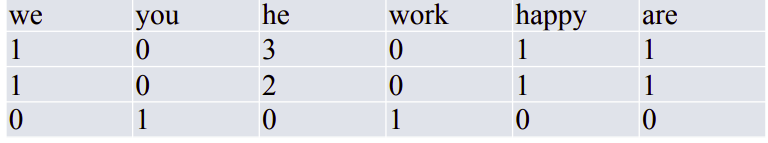

* 余弦定理

$$\text { similarity }=\cos (\theta)=\frac{A \cdot B}{\|A\|\|B\|}$$

### Frequency频率统计
* nltk.FreDist


In [49]:
import nltk
from nltk import FreqDist

#词库
corpus = 'this is my sentence ' \
 'this is my life ' \
 'this is the day'

"""
随便tokenize⼀下.显然, 正如上⽂提到,这⾥可以根据需要做任何的preprocessing:stopwords, 
lemma, stemming, etc.
"""
tokens=nltk.word_tokenize(corpus)#得到token好的word list
print(tokens)

#NLTK.FreDist  统计一下文字出现的频率
fdist=FreqDist(tokens)
print(fdist['is'])

['this', 'is', 'my', 'sentence', 'this', 'is', 'my', 'life', 'this', 'is', 'the', 'day']
3


In [50]:
# 为什么要统计最常用的单词，是为了降低模型的复杂度，而且有些词根本出现次数不多，显得冗余
standard_freq_vector=fdist.most_common(50)
size=len(standard_freq_vector)
standard_freq_vector

[('this', 3),
 ('is', 3),
 ('my', 2),
 ('sentence', 1),
 ('life', 1),
 ('the', 1),
 ('day', 1)]

In [51]:
# Func:按照出现频率大小，记录下每一个单词的位置
def position_lookup(v):
  res={}
  counter=0
  for word in v:
    res[word[0]]=counter
    counter+=1
  return res


#把标准的单词位置记录下来
standard_position_dict=position_lookup(standard_freq_vector)
standard_position_dict

{'day': 6, 'is': 1, 'life': 4, 'my': 2, 'sentence': 3, 'the': 5, 'this': 0}

In [52]:
# 这时, 如果我们有个新句⼦:
sentence = 'this is cool'
# 先新建⼀个跟我们的标准vector同样⼤⼩的向量
freq_vector = [0] * size
# 简单的Preprocessing
tokens = nltk.word_tokenize(sentence)
# 对于这个新句⼦⾥的每⼀个单词
for word in tokens:
 try:
 # 如果在我们的词库⾥出现过
 # 那么就在"标准位置"上+1
     freq_vector[standard_position_dict[word]] += 1
 except KeyError:
 # 如果是个新词
 # 就pass掉
     continue
     
print(freq_vector)
# [1, 1, 0, 0, 0, 0, 0]
# 第⼀个位置代表 is, 出现了⼀次
# 第⼆个位置代表 this, 出现了⼀次
# 后⾯都⽊有

[1, 1, 0, 0, 0, 0, 0]


但是，现在词频统计用的比较少了，比较简单，只是简单的累加出现次数，没有计算单词出现的权重

### 文本分类

##### TF-IDF

* **TF: Term Frequency**, 衡量⼀个term在⽂档中出现得有多频繁。

TF(t) = (t出现在⽂档中的次数) / (⽂档中的term总数).

* **IDF: Inverse Document Frequency**, 衡量⼀个term有多重要。

有些词出现的很多，但是明显不是很有卵⽤。⽐如’is'，’the‘，’and‘之类
的。

为了平衡，我们把罕见的词的重要性（weight）搞⾼，
把常见词的重要性搞低。

IDF(t) = log_e(⽂档总数 / 含有t的⽂档总数).

TF-IDF = TF * IDF **加粗文字**

举个栗⼦ :

⼀个⽂档有100个单词，其中单词baby出现了3次。
那么，TF(baby) = (3/100) = 0.03.

好，现在我们如果有10M的⽂档， baby出现在其中的1000个⽂档中。
那么，IDF(baby) = log(10,000,000 / 1,000) = 4

所以， TF-IDF(baby) = TF(baby) * IDF(baby) = 0.03 * 4 = 0.12

### NLTK实现TF-IDF

* TF-IDF算法介绍及实现
  * https://blog.csdn.net/weixin_35770067/article/details/108245413

In [64]:
from nltk.text import TextCollection
from nltk.tokenize import word_tokenize
 
#首先，构建语料库corpus
sents=['this is sentence one','this is sentence two','this is sentence three']
sents=[word_tokenize(sent) for sent in sents] #对每个句子进行分词
print(sents)  #输出分词后的结果
corpus=TextCollection(sents)  #构建语料库
print('\n')
#print(corpus)  #输出语料库
 
#计算语料库中"one"的tf值
tf=corpus.tf('one',corpus)    # 1/12
print(tf)

#计算语料库中"one"的idf值
idf=corpus.idf('one')      #log(3/1)
print(idf)

#计算语料库中"one"的tf-idf值
tf_idf=corpus.tf_idf('one',corpus)
print(tf_idf)

[['this', 'is', 'sentence', 'one'], ['this', 'is', 'sentence', 'two'], ['this', 'is', 'sentence', 'three']]


0.08333333333333333
1.0986122886681098
0.0915510240556758


### 深度学习的加持

#### gensim
* 官方文档：https://radimrehurek.com/gensim/
* 关于gensim可以看下面这篇文章
  * https://blog.csdn.net/weixin_35770067/article/details/108252739

Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。

它支持包括`TF-IDF`，`LSA`，`LDA`，和`word2vec`在内的多种主题模型算法，

支持流式训练，并提供了诸如相似度计算，信息检索等一些常用任务的API接口

#### 将文档集做成语料库

In [15]:
#文档集
documents = ["Human machine interface for lab abc computer applications",
              "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

In [17]:
#去冠词,连接词等
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

In [21]:
#统计词频
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

print(frequency)

defaultdict(<class 'int'>, {'human': 2, 'machine': 1, 'interface': 2, 'lab': 1, 'abc': 1, 'computer': 2, 'applications': 1, 'survey': 2, 'user': 3, 'opinion': 1, 'system': 4, 'response': 2, 'time': 2, 'eps': 2, 'management': 1, 'engineering': 1, 'testing': 1, 'relation': 1, 'perceived': 1, 'error': 1, 'measurement': 1, 'generation': 1, 'random': 1, 'binary': 1, 'unordered': 1, 'trees': 3, 'intersection': 1, 'graph': 3, 'paths': 1, 'minors': 2, 'iv': 1, 'widths': 1, 'well': 1, 'quasi': 1, 'ordering': 1})


In [22]:
#去掉低频词
from pprint import pprint
texts = [[token for token in text if frequency[token] > 1]
          for text in texts]
pprint(texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [24]:
#获取词库dictionary
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.save('/content/deerwester.dict')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [25]:
dictionary
print(dictionary.token2id)

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


In [20]:
#将文档转为语料库corpus,统计的是词典中每个单词在文本张出现的频率
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


In [26]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)  # 综合获取所有单词，作为综合特征（语料库）
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]  # 利用语料特征，为每一句话，建立稀疏向量（这里是bow向量）。对应特征（单词）出现的次数
print(corpus)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)
[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


In [27]:
# 流式处理，内存优化
class MyCorpus(object):
    def __iter__(self):
        for line in open('mycorpus.txt'):
            # 假设文档中每行是一个句子，使用空格分割
            yield dictionary.doc2bow(line.lower().split(' '))

In [28]:
from gensim import models
tfidf = models.TfidfModel(corpus)
doc_bow = [(0, 1), (1, 1)]  # 表示语料库中的第0个单词出现1次，第1个单词出现1次
print(tfidf[doc_bow]) #  将语料转化为TFIDF向量

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


#### 主题向量的变换

In [46]:
from gensim import models
tfidf = models.TfidfModel(corpus)

In [47]:
doc_bow = [(0, 1), (1, 1)]  # 表示语料库中的第0个单词出现1次，第1个单词出现1次
print(tfidf[doc_bow]) #  将语料转化为TFIDF向量

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [48]:
tfidf.save("/content/model.tfidf")   # 存储模型
tfidf = models.TfidfModel.load("/content/model.tfidf")  # 加载模型

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#### 文本相似度的计算

##### 一般计算相似度

In [58]:
# 1.将原始数据进行分词
texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [57]:
# 2.生成字典
dictionary = corpora.Dictionary(texts)  # 综合获取所有单词，作为综合特征（语料库）
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [60]:
# 3.通过doc2bow稀疏向量生成语料库
corpus = [dictionary.doc2bow(text) for text in texts]  # 利用语料特征，为每一句话，建立稀疏向量（这里是bow向量）。对应特征（单词）出现的次数
print(corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


In [63]:
# 4.通过TF模型算法，计算出tf值
tf = models.TfidfModel(corpus)
print(tf)

TfidfModel(num_docs=9, num_nnz=28)


In [68]:
# 5.通过token2id得到特征数（字典里面的键的个数）
num_features = len(dictionary.token2id.keys())
num_features

12

In [69]:
# 6.计算稀疏矩阵相似度，建立一个索引
index = similarities.MatrixSimilarity(tf[corpus], num_features=num_features)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [72]:
# 7.处理测试数据
import jieba
test_text = "风雨凄凄，鸡鸣喈喈。既见君子，云胡不夷。风雨潇潇，鸡鸣胶胶。既见君子，云胡不瘳。风雨如晦，鸡鸣不已。既见君子，云胡不喜。"
test_words = [word for word in jieba.cut(test_text)]
print(test_words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.930 seconds.
Prefix dict has been built successfully.


['风雨凄凄', '，', '鸡鸣', '喈', '喈', '。', '既见', '君子', '，', '云', '胡不夷', '。', '风', '雨潇潇', '，', '鸡鸣', '胶胶', '。', '既见', '君子', '，', '云胡', '不', '瘳', '。', '风雨如晦', '，', '鸡鸣不已', '。', '既见', '君子', '，', '云', '胡不喜', '。']


In [73]:
# 8.新的稀疏向量
new_vec = dictionary.doc2bow(test_words)

In [74]:
# 9.算出相似度
sims = index[tf[new_vec]]
print(list(sims))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


##### LSI向量空间

In [70]:
from gensim import similarities
# 构造LSI模型并将待检索的query和文本转化为LSI主题向量
# 转换之前的corpus和query均是BOW向量
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
documents = lsi_model[corpus]
query = dictionary.doc2bow(['search','word'])
query_vec = lsi_model[query]

In [65]:
index = similarities.MatrixSimilarity(documents)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [54]:
index.save('/content/deerwester.index')
index = similarities.MatrixSimilarity.load('/content/deerwester.index')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [66]:
sims = index[query_vec] # return: an iterator of tuple (idx, sim)
sims

array([0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [76]:
import jieba
from gensim import corpora, models, similarities

if __name__ == '__main__':
    base_data = [
        "好雨知时节，当春乃发生。随风潜入夜，润物细无声。野径云俱黑，江船火独明。晓看红湿处，花重锦官城。",
        "君问归期未有期，巴山夜雨涨秋池。何当共剪西窗烛，却话巴山夜雨时。",
        "莫听穿林打叶声，何妨吟啸且徐行。竹杖芒鞋轻胜马，谁怕？一蓑烟雨任平生。料峭春风吹酒醒，微冷，山头斜照却相迎。回首向来萧瑟处，归去，也无风雨也无晴。",
        "天街小雨润如酥，草色遥看近却无。最是一年春好处，绝胜烟柳满皇都。",
        "古木阴中系短篷，杖藜扶我过桥东。沾衣欲湿杏花雨，吹面不寒杨柳风。",
        "少年听雨歌楼上。红烛昏罗帐。壮年听雨客舟中。江阔云低、断雁叫西风。 而今听雨僧庐下。鬓已星星也。悲欢离合总无情。一任阶前、点滴到天明。",
        "雨里鸡鸣一两家，竹溪村路板桥斜。妇姑相唤浴蚕去，闲看中庭栀子花。",
        "一夕轻雷落万丝，霁光浮瓦碧参差。有情芍药含春泪，无力蔷薇卧晓枝。"
    ]

    # 1.将base_data中的数据进行遍历后分词
    base_items = [[i for i in jieba.lcut(item)] for item in base_data]
    print(base_items)

    # 2.生成词典
    dictionary = corpora.Dictionary(base_items)
    # 3.通过doc2bow稀疏向量生成语料库
    corpus = [dictionary.doc2bow(item) for item in base_items]
    # 4.通过TF模型算法，计算出tf值
    tf = models.TfidfModel(corpus)
    # 5.通过token2id得到特征数（字典里面的键的个数）
    num_features = len(dictionary.token2id.keys())
    # 6.计算稀疏矩阵相似度，建立一个索引
    index = similarities.MatrixSimilarity(tf[corpus], num_features=num_features)

    # 7.处理测试数据
    test_text = "风雨凄凄，鸡鸣喈喈。既见君子，云胡不夷。风雨潇潇，鸡鸣胶胶。既见君子，云胡不瘳。风雨如晦，鸡鸣不已。既见君子，云胡不喜。"
    test_words = [word for word in jieba.cut(test_text)]
    print(test_words)

    # 8.新的稀疏向量
    new_vec = dictionary.doc2bow(test_words)
    # 9.算出相似度
    sims = index[tf[new_vec]]
    print(list(sims))

[['好雨知', '时节', '，', '当春', '乃', '发生', '。', '随风潜入夜', '，', '润物细无声', '。', '野径', '云俱黑', '，', '江船', '火独明', '。', '晓看', '红湿处', '，', '花重锦', '官城', '。'], ['君问', '归期', '未有', '期', '，', '巴山夜雨', '涨秋池', '。', '何当', '共', '剪', '西窗', '烛', '，', '却', '话', '巴山夜雨', '时', '。'], ['莫听', '穿林', '打叶声', '，', '何妨', '吟啸且', '徐行', '。', '竹杖芒', '鞋', '轻胜马', '，', '谁', '怕', '？', '一', '蓑', '烟雨任', '平生', '。', '料峭', '春风', '吹', '酒醒', '，', '微冷', '，', '山头', '斜照', '却', '相迎', '。', '回首', '向来', '萧瑟处', '，', '归去', '，', '也', '无', '风雨', '也无晴', '。'], ['天街', '小雨', '润', '如', '酥', '，', '草色', '遥看', '近', '却', '无', '。', '最是', '一年', '春', '好处', '，', '绝胜', '烟柳', '满皇', '都', '。'], ['古木', '阴中系', '短篷', '，', '杖', '藜', '扶', '我', '过桥', '东', '。', '沾衣', '欲', '湿', '杏花', '雨', '，', '吹面', '不寒', '杨柳风', '。'], ['少年', '听雨歌', '楼上', '。', '红烛', '昏罗帐', '。', '壮年', '听雨', '客舟', '中', '。', '江阔', '云低', '、', '断雁叫', '西风', '。', ' ', '而今', '听雨僧', '庐下', '。', '鬓', '已', '星星', '也', '。', '悲欢离合', '总', '无情', '。', '一任', '阶前', '、', '点滴', '到', '天明', '。'], ['雨里', '鸡鸣', '一两家', '，', '竹溪', '村路'

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#### Word2Vec

In [82]:
import gensim
import os
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()

sentences = MySentences('/content/directory') # a memory-friendly iterator

In [84]:
model = gensim.models.Word2Vec(sentences)

In [90]:
# 引入 word2vec
from gensim.models import word2vec

# 引入日志配置
#import logging

#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# 引入分词工具
import jieba

# 引入数据集
raw_sentences = ["但由于中文没有像英文那么自带天然的分词","所以我们第一步采用分词"]

# 切分词汇
sentences = []
for s in raw_sentences:
    tmp = []
    for item in jieba.cut(s):
        tmp.append(item)
    sentences.append(tmp)
print(sentences)

[['但', '由于', '中文', '没有', '像', '英文', '那么', '自带', '天然', '的', '分词'], ['所以', '我们', '第一步', '采用', '分词']]


In [94]:
# 构建模型
model = word2vec.Word2Vec(sentences, min_count=1)

# 进行词向量输出
#model['中文']

2020-08-27 03:02:11,150 : INFO : collecting all words and their counts
2020-08-27 03:02:11,152 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-27 03:02:11,153 : INFO : collected 15 word types from a corpus of 16 raw words and 2 sentences
2020-08-27 03:02:11,155 : INFO : Loading a fresh vocabulary
2020-08-27 03:02:11,157 : INFO : effective_min_count=1 retains 15 unique words (100% of original 15, drops 0)
2020-08-27 03:02:11,158 : INFO : effective_min_count=1 leaves 16 word corpus (100% of original 16, drops 0)
2020-08-27 03:02:11,160 : INFO : deleting the raw counts dictionary of 15 items
2020-08-27 03:02:11,162 : INFO : sample=0.001 downsamples 15 most-common words
2020-08-27 03:02:11,163 : INFO : downsampling leaves estimated 2 word corpus (13.7% of prior 16)
2020-08-27 03:02:11,168 : INFO : estimated required memory for 15 words and 100 dimensions: 19500 bytes
2020-08-27 03:02:11,169 : INFO : resetting layer weights
2020-08-27 03:02:11,179 : INFO :

In [96]:
from gensim.models.word2vec import LineSentence
from gensim.models.word2vec import Text8Corpus

sentences = LineSentence('a.txt')
sentences = Text8Corpus('a.txt')

In [140]:
#!wget http://mattmahoney.net/dc/text8.zip
sentences = word2vec.Text8Corpus('/content/drive/My Drive/VQA/text8')
model = word2vec.Word2Vec(sentences, size=20)

2020-08-27 03:52:23,603 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-08-27 03:52:23,621 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-27 03:52:29,089 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2020-08-27 03:52:29,090 : INFO : Loading a fresh vocabulary
2020-08-27 03:52:29,474 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2020-08-27 03:52:29,477 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2020-08-27 03:52:29,767 : INFO : deleting the raw count

In [123]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()

sentences = MySentences('/content/drive/My Drive/temp') # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)

2020-08-27 03:31:51,755 : INFO : collecting all words and their counts
2020-08-27 03:31:53,018 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-27 03:31:56,896 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1 sentences
2020-08-27 03:31:56,897 : INFO : Loading a fresh vocabulary
2020-08-27 03:31:57,215 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2020-08-27 03:31:57,216 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2020-08-27 03:31:57,452 : INFO : deleting the raw counts dictionary of 253854 items
2020-08-27 03:31:57,510 : INFO : sample=0.001 downsamples 38 most-common words
2020-08-27 03:31:57,511 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2020-08-27 03:31:57,803 : INFO : estimated required memory for 71290 words and 100 dimensions: 92677000 bytes
2020-08-27 03:31:57,804 : INF

In [133]:
model.save('/content/drive/My Drive/VQA/text8.model')

2020-08-27 03:49:05,349 : INFO : saving Word2Vec object under /content/drive/My Drive/VQA/text8.model, separately None
2020-08-27 03:49:05,351 : INFO : not storing attribute vectors_norm
2020-08-27 03:49:05,352 : INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-08-27 03:49:05,678 : INFO : saved /content/drive/My Drive/VQA/text8.model


In [110]:
model1=word2vec.Word2Vec.load('/content/drive/My Drive/VQA/text8.model')

2020-08-27 03:26:25,686 : INFO : loading Word2Vec object from /content/drive/My Drive/VQA/text8.model
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-08-27 03:26:26,455 : INFO : loading wv recursively from /content/drive/My Drive/VQA/text8.model.wv.* with mmap=None
2020-08-27 03:26:26,456 : INFO : setting ignored attribute vectors_norm to None
2020-08-27 03:26:26,457 : INFO : loading vocabulary recursively from /content/drive/My Drive/VQA/text8.model.vocabulary.* with mmap=None
2020-08-27 03:26:26,460 : INFO : loading trainables recursively from /content/drive/My Drive/VQA/text8.model.trainables.* with mmap=None
2020-08-27 03:26:26,462 : INFO : setting ignored attribute cum_table 

In [112]:
model1.wv.save_word2vec_format('/content/drive/My Drive/VQA/text.model.bin', binary=True)

2020-08-27 03:27:06,590 : INFO : storing 71290x100 projection weights into /content/drive/My Drive/VQA/text.model.bin
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [142]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('empress', 0.908510148525238),
 ('emperor', 0.8917052745819092),
 ('consul', 0.8867863416671753),
 ('viii', 0.8603659868240356),
 ('constantine', 0.8601230382919312)]

In [143]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'cereal'

In [144]:
model.wv.similarity('woman', 'man')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8962993

In [145]:
model.most_similar(['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('woman', 0.8962993621826172),
 ('creature', 0.8722896575927734),
 ('mortal', 0.8398157358169556),
 ('immortal', 0.8280965685844421),
 ('lady', 0.8186058402061462),
 ('love', 0.8164145350456238),
 ('frodo', 0.8144702911376953),
 ('witch', 0.8118389844894409),
 ('odin', 0.8106104731559753),
 ('curse', 0.8105427026748657)]

In [146]:
model['computer']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.873207  , -4.3575926 , -0.7075361 , -1.0461179 ,  2.1580493 ,
       -2.7129724 ,  3.024015  , -3.7949312 ,  4.6527395 , -2.157235  ,
        1.8130941 , -2.2809258 , -2.0773365 ,  3.9518857 ,  1.96224   ,
       -0.9358364 , -2.7152145 ,  0.8164732 ,  0.48446816, -1.3217882 ],
      dtype=float32)

In [141]:
#!wget https://github.com/nicholas-leonard/word2vec/blob/master/questions-words.txt
model.accuracy("/content/drive/My Drive/VQA/questions-words.txt")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-08-27 03:55:29,660 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2020-08-27 03:55:31,616 : INFO : capital-common-countries: 8.9% (45/506)
2020-08-27 03:55

[{'correct': [('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('BAGHDAD', 'IRAQ', 'HAVANA', 'CUBA'),
   ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
   ('BANGKOK', 'THAILAND', 'TEHRAN', 'IRAN'),
   ('BANGKOK', 'THAILAND', 'ATHENS', 'GREECE'),
   ('BEIJING', 'CHINA', 'BERLIN', 'GERMANY'),
   ('BEIJING', 'CHINA', 'MADRID', 'SPAIN'),
   ('BEIJING', 'CHINA', 'PARIS', 'FRANCE'),
   ('BERLIN', 'GERMANY', 'HAVANA', 'CUBA'),
   ('BERLIN', 'GERMANY', 'PARIS', 'FRANCE'),
   ('BERN', 'SWITZERLAND', 'CANBERRA', 'AUSTRALIA'),
   ('BERN', 'SWITZERLAND', 'STOCKHOLM', 'SWEDEN'),
   ('CAIRO', 'EGYPT', 'TEHRAN', 'IRAN'),
   ('CANBERRA', 'AUSTRALIA', 'OTTAWA', 'CANADA'),
   ('HAVANA', 'CUBA', 'KABUL', 'AFGHANISTAN'),
   ('HELSINKI', 'FINLAND', 'MADRID', 'SPAIN'),
   ('HELSINKI', 'FINLAND', 'PARIS', 'FRANCE'),
   ('HELSINKI', 'FINLAND', 'TOKYO', 'JAPAN'),
   ('HELSINKI', 'FINLAND', 'BEIJING', 'CHINA'),
   ('HELSINKI', 'FINLAND', 'BERLIN', 'GERMANY'),
   ('ISLAMABA

#### Auto-Encoder

自编码器(Autoencoder,AE),是一种利用反向传播算法使得输出值等于输入值的神经网络，它先将输入压缩成潜在空间表征，然后通过这种表征来重构输出。

自编码器有两部分组成：
* 编码器：这部分能将输入亚索成潜在空间表征，可以用编码函数$h=f(x)$来表示
* 解码器：这部分能重构赖在潜在空间表征的输入，可以用解码函数$r=g(h)$来表示

因此，整个自编码器可以用函数$g(f(x))=r$来描述，其中输出$r$与原始输入$x$相近

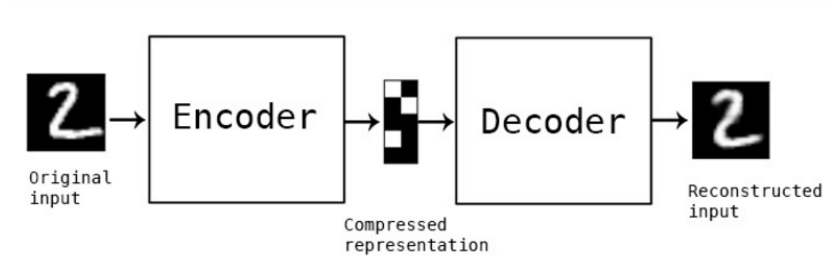

下面我们用KMenas算法和AutoEncoder来将句子进行聚类，输入句子即可预测属于哪一类主题

In [65]:
from keras.layers import Input,Dense
from keras.models import Model
from sklearn.cluster import KMeans

In [ ]:
class ASCIIAutoencoder():
  #基于字符的Autoencoder
  def __init__(self,sen_len=512,encoding_dim=32,epoch=50,val_ration=0.5):
    """
    sen_len:把sentence pad成相同的初始长度
    encoding_dim:压缩后的维度dim
    epoch：训练次数
    ration:在训练集中又划分出30%的val验证集
    kmeanmodel:简单的KNN clustering模型
    """
    self.sen_len=sen_len
    self.encoding_dim=encoding_dim
    self.autoencoder=None
    self.encoder=None
    self.kmeanmodel=KMeans(n_clusters=2)
    self.epoch=epoch
  
  def preprocess(self,s_list,length=256):
    """
    这部分预处理包括：分词、正则表达式、停用词等一些预处理操作
    """
  def predict(self, x):
    """
    做预测。
    :param x: input text
    :return: predictions
    """
    # 同理，第⼀步 把来的 都给搞成ASCII化，并且⻓度相同
    x_test = self.preprocess(x, length=self.sen_len)
    # 然后⽤encoder把test集给压缩
    x_test = self.encoder.predict(x_test)
    # KNN给分类出来
    preds = self.kmeanmodel.predict(x_test)
    return preds 
  
  def fit(self,x):
    #把所有的trainset都搞成同一个size，并把每一个字符都换成ascii码
    x_train=self.preprocess(x,length=self.sen_len)
    #然后给input预留好位置
    input_text=Input(shape=(self.sen_len,))
    # 'encoded'每经过一层，都被刷新成小一点的'压缩后表达式'
    encoded=Dense(1024,activation='tanh')(input_text)
    encoded = Dense(512, activation='tanh')(encoded)
    encoded = Dense(128, activation='tanh')(encoded)
    encoded = Dense(self.encoding_dim, activation='tanh')(encoded)#最终压缩成32维

    # 'decoded'就是把刚刚压缩完的东西，给反过来还原成Input_text
    decoded = Dense(128, activation='tanh')(encoded)
    decoded = Dense(512, activation='tanh')(decoded)
    decoded = Dense(1024, activation='tanh')(decoded)
    decoded = Dense(self.sen_len, activation='sigmoid')(decoded)

    # 整个从大到小再到大的model，叫autoencoder
    self.autoencoder=Model(input=input_text,output=decoded)
    # 那么 只从大到小（也就是一半的model）就叫encoder
    self.encoder=Model(input=input_text,output=encoded)
    
  # 同理，我们接下来搞一个decoder出来，也就是从小到大的model
  # 首先encoded的input，size给预留好
  encoded_input=Input(shape=(1024,))
  # autoencoder的最后一层，就应该是decoder的第一层
  decoder_layer=self.autoencoder.layers[-1]
  #从头到位连接起来，就是一个decoder了
  decoder=Model(input=encoded_input,output=decoder_layer)

  #compile
  self.autoencoder.compile(optimizer='adam',loss='mse')
  #跑起来
  self.autoencoder.fit(x_train,x_train,nb_epoch=self.epoch,batch_size=1000,shuffle=True)
  # 这一部分是自己拿自己train一下KNN，一件简单的基于距离的分类器
  x_train=self.encoder.predict(x_train)
  self.kmeanmodel.fit(x_train)

#### Word2Vec

##### 什么是word2vec

在聊 Word2vec 之前，先聊聊 NLP。NLP里面，最细粒度的是词语，词语组成句子，句子再组成段落、篇章、文档。所以处理 NLP 的问题，首先就要拿词语开刀。

举个简单例子，判断一个词的词性，是动词还是名词。用机器学习的思路，我们有一系列样本$(x,y)$，这里 $x$ 是词语，$y$ 是它们的词性，我们要构建 $f(x)->y$ 的映射，但这里的数学模型 $f$（比如神经网络、SVM）只接受数值型输入，而NLP里的词语，是人类的抽象总结，是符号形式的（比如中文、英文、拉丁文等等），所以**需要把他们转换成数值形式，或者说——嵌入到一个数学空间里，这种嵌入方式，就叫词嵌入**（word embedding)，而 Word2vec，就是词嵌入（ word embedding) 的一种

在NLP中，把$x$看做一个句子里的一个词语，$y$是这个词语的**上下文词语**，那么这里的$f$，便是 NLP 中经常出现的『语言模型』（language model），这个模型的目的，就是判断 $(x,y)$ 这个样本，是否符合自然语言的法则，更通俗点说就是：词语$x$和词语$y$放在一起，是不是人话。

`Word2vec`正是来源于这个思想，但它的最终目的，不是要把 $f$ 训练得多么完美，而是只关心模型训练完后的副产物——**模型参数**（这里特指神经网络的权重），并将这些参数，作为输入 $x$ 的某种向量化的表示，这个向量便叫做——词向量.

我们来看个例子，如何用 `Word2vec` 寻找相似词：

* 对于一句话：『她们 夸 吴彦祖 帅 到 没朋友』，如果输入 $x$ 是『吴彦祖』，那么 $y$ 可以是『她们』、『夸』、『帅』、『没朋友』这些词
* 现有另一句话：『她们 夸 我 帅 到 没朋友』，如果输入 $x$ 是『我』，那么不难发现，这里的上下文 $y$ 跟上面一句话一样
* 从而 f(吴彦祖) = f(我) = y，所以大数据告诉我们：我 = 吴彦祖（完美的结论）

##### Skip-gram和CBOW模型

上面我们提到了语言模型

* 如果是用一个词语作为输入，来预测它周围的上下文，那这个模型叫做Skip-gram模型
* 如果是拿一个词语的上下文作为输入，来预测这个词语本身，则是CBOW模型

##### Skip-gram 和 CBOW 的简单情形

我们先来看个最简单的例子。上面说到， $y$ 是 $x$ 的上下文，所以 $y$ 只取上下文里一个词语的时候，语言模型就变成：

* 用当前词 x 预测它的下一个词 y


但如上面所说，一般的数学模型只接受数值型输入，这里的 $x$ 该怎么表示呢？ 显然不能用 `Word2vec`，因为这是我们训练完模型的产物，现在我们想要的是 $x$ 的一个原始输入形式。

* 答案是：one-hot encoder

所谓 `one-hot encoder`，其思想跟特征工程里处理类别变量的 `one-hot` 一样。本质上是用一个只含一个 1、其他都是 0 的向量来唯一表示词语。

我举个例子，假设全世界所有的词语总共有 $V$ 个，这 $V$ 个词语有自己的先后顺序，假设『吴彦祖』这个词是第1个词，『我』这个单词是第2个词，那么『吴彦祖』就可以表示为一个 $V$ 维全零向量、把第1个位置的0变成1，而『我』同样表示为 $V$ 维全零向量、把第2个位置的0变成1。这样，每个词语都可以找到属于自己的唯一表示。

OK，那我们接下来就可以看看 `Skip-gram` 的网络结构了，$x$ 就是上面提到的 `one-hot encoder` 形式的输入，$y$ 是在这 $V$ 个词上输出的概率，我们希望跟真实的 $y$ 的 `one-hot encoder` 一样。

![](https://pic3.zhimg.com/v2-a1a73c063b32036429fbd8f1ef59034b_r.jpg)


首先说明一点：**隐层的激活函数其实是线性的**，相当于没做任何处理（这也是 Word2vec 简化之前语言模型的独到之处），我们要训练这个神经网络，用**反向传播算法**，本质上是链式求导，在此不展开说明了，

当模型训练完后，最后得到的其实是**神经网络的权重**，比如现在输入一个 $x$ 的 `one-hot encoder`: [1,0,0,…,0]，对应刚说的那个词语『吴彦祖』，则在输入层到隐含层的权重里，只有对应 1 这个位置的权重被激活，这些权重的个数，跟隐含层节点数是一致的，从而这些权重组成一个向量 $v_{x}$ 来表示$x$，而因为每个词语的 `one-hot encoder` 里面 1 的位置是不同的，所以，这个向量 $v_{x}$ 就可以用来唯一表示 x。

**注意：上面这段话说的就是 Word2vec 的精髓**

此外，我们刚说了，输出 $y$ 也是用 $V$ 个节点表示的，对应$V$个词语，所以其实，我们把输出节点置成 [1,0,0,…,0]，它也能表示『吴彦祖』这个单词，但是激活的是隐含层到输出层的权重，这些权重的个数，跟隐含层一样，也可以组成一个向量 $v_{y}$，跟上面提到的 $v_{x}$ 维度一样，并且可以看做是词语『吴彦祖』的另一种词向量。而这两种词向量 $v_{x}$ 和 $v_{y}$，正是 Mikolov 在论文里所提到的，『输入向量』和『输出向量』，一般我们用『输入向量』。

需要提到一点的是，这个词向量的维度（与隐含层节点数一致）一般情况下要远远小于词语总数 $V$ 的大小，所以 `Word2vec` 本质上是一种降维操作——把词语从 `one-hot encoder` 形式的表示降维到 `Word2vec` 形式的表示。






##### Skip-gram更一般的情形

上面讨论的是最简单情形，即 $y$ 只有一个词，**当 $y$ 有多个词时**，网络结构如下：
![](https://pic1.zhimg.com/v2-ca81e19caa378cee6d4ba6d867f4fc7c_r.jpg)



可以看成是单个x->单个y模型的并联，`cost function` 是单个 `cost function` 的累加（取log之后）

如果你想深入探究这些模型是如何并联、 `cost function `的形式怎样，不妨仔细阅读参考资料4. 在此我们不展开。


##### CBOW更一般的情形

跟 `Skip-gram` 相似，只不过:

`Skip-gram` 是预测一个词的上下文，而 `CBOW` 是用上下文预测这个词

网络结构如下

![](https://pic4.zhimg.com/v2-d1ca2547dfb91bf6a26c60782a26aa02_r.jpg)


更 `kip-gram` 的模型并联不同，这里是输入变成了多个单词，所以要对输入处理下（一般是求和然后平均），输出的 `cost function` 不变，在此依然不展开，建议你阅读参考资料4.

##### Word2vec 的训练trick

相信很多初次踩坑的同学，会跟我一样陷入 Mikolov 那篇论文里提到的 `hierarchical softmax` 和 `negative sampling` 里不能自拔，但其实，它们并不是 Word2vec 的精髓，只是它的训练技巧，但也不是它独有的训练技巧。 

`Hierarchical softmax` 只是 `softmax` 的一种近似形式，而 `negative sampling` 也是从其他方法借鉴而来。

为什么要用训练技巧呢？ 如我们刚提到的，`Word2vec` 本质上是一个语言模型，它的输出节点数是 $V$ 个，对应了 $V$ 个词语，本质上是一个多分类问题，但实际当中，**词语的个数非常非常多，会给计算造成很大困难，所以需要用技巧来加速训练**。

这里我总结了一下这两个 `trick` 的本质，有助于大家更好地理解，在此也不做过多展开.

* hierarchical softmax
  * 本质是把 $N$ 分类问题变成 $log(N)$次二分类


* negative sampling
  * 本质是预测总体类别的一个子集


##### 扩展

很多时候，当我们面对林林总总的模型、方法时，我们总希望总结出一些本质的、共性的东西，以构建我们的知识体系，比如我在分类和回归的本质里，原创性地梳理了分类模型和回归模型的本质联系，比如在**词嵌入**领域，除了 `Word2vec`之外，还有基于共现**矩阵分解**的 `GloVe` 等等词嵌入方法。

深入进去我们会发现，**神经网络形式表示的模型**（如 Word2vec），跟共现矩阵分解模型（如 GloVe），有理论上的相通性. ——来斯惟博士在它的博士论文附录部分，证明了 `Skip-gram` 模型和 `GloVe` 的 `cost fucntion` 本质上是一样的。是不是一个很有意思的结论？ 所以在实际应用当中，这两者的差别并不算很大，尤其在很多 `high-level` 的 `NLP` 任务（如句子表示、命名体识别、文档表示）当中，经常把词向量作为原始输入，而到了 high-level 层面，差别就更小了。

鉴于词语是 NLP 里最细粒度的表达，所以词向量的应用很广泛，既可以执行词语层面的任务，也可以作为很多模型的输入，执行 high-level 如句子、文档层面的任务，包括但不限于：

* 计算相似度
  * 寻找相似词
  * 信息检索
* 作为 SVM/LSTM 等模型的输入
  * 中文分词
  * 命名体识别
* 句子表示
  * 情感分析
* 文档表示
  * 文档主题判别





#### 实战

上面讲了这么多理论细节，其实在真正应用的时候，只需要调用 `Gensim` （一个 Python 第三方库）的接口就可以。但对理论的探究仍然有必要，你能更好地知道参数的意义、模型结果受哪些因素影响，以及举一反三地应用到其他问题当中，甚至更改源码以实现自己定制化的需求。

这里我们将使用 `Gensim` 和 `NLTK` 这两个库，来完成对生物领域的相似词挖掘，将涉及：

* 解读 `Gensim` 里 `Word2vec` 模型的参数含义
* 基于相应语料训练 `Word2vec` 模型，并评估结果
* 对模型结果调优




##### 正文

建议使用jupyter notebook，方便执行代码片段。并提前安装好`gensim`和`nltk`这两个python库

##### 数据集

我们这里使用的是一个医学领域的数据集，这个数据集是一个非公开数据集，爬取了多篇医学论文的摘要，被我处理成一句话一行的形式。

我们可以再jupyter notebook上运行来查看数据集大致情况

In [148]:
import pandas as pd
data = pd.read_table('/content/drive/My Drive/VQA/bioCorpus_5000.txt',header=None)
print(data.shape)
data.head()

(4825, 1)


,0
0,formate assay in body fluids application in m...
1,delineation of the intimate details of the bac...
2,metal substitutions incarbonic anhydrase a ha...
3,effect of chloroquine on cultured fibroblasts ...
4,atomic models for the polypeptide backbones of...


可以看到，这个数据集相对还是比较干净的，因为我做了一些预处理，包括去除异常字符，首字母改小写等，但并没有做 stemming 之类的操作，个人觉得不同时态的单词应该区别对待。

##### 模型训练

先import我们今天的主角--word2vec

In [149]:
from gensim.models import word2vec 

word2vec接受的输入格式类似于

* [['I', 'am', 'hansome'], ['Mu', 'wen', 'looks', 'cool'], ...]

即一个列表，里面的元素也是列表，每个列表里代表一句话，把这句话的单词切割开作为列表元素

但当我们有非常多的句子而内存有限时，把他们都存储到列表并load到内存里，就不太合适了，所以我们此时定义一个生成器


In [150]:
# 用生成器的方式读取文件里的句子 适合读取大容量文件，而不用加载到内存中

class MySentences(object):
  def __init__(self,fname):
    self.fname=fname
  def __iter__(self):
    for line in open(self.fname,'r'):
      yield line.split()

同时还可以定义一个训练函数，指定输入的文件路径和待输出的模型路径，如下


In [151]:
# 模型训练函数
def w2vTrain(f_input, model_output):         
    sentences = MySentences(DataDir+f_input)
    w2v_model = word2vec.Word2Vec(sentences, 
                                  min_count = MIN_COUNT, 
                                  workers = CPU_NUM, 
                                  size = VEC_SIZE,
                                  window = CONTEXT_WINDOW
                                 )
    w2v_model.save(ModelDir+model_output)

注意到，这里的`word2vec.Word2Vec()`便是word2vec在gensim中的实现，里面的而参数解释如下：
* `min_count`: 对于词频 < `min_count` 的单词，将舍弃（其实最合适的方法是用 UNK 符号代替，即所谓的『未登录词』，这里我们简化起见，认为此类低频词不重要，直接抛弃）

* `workers`: 可以并行执行的核心数，需要安装 Cython 才能起作用（安装 Cython 的方法很简单，直接 pip install cython）

* `size`: 词向量的维度，神经网络隐层节点数

* `window`: 目标词汇的上下文单词距目标词的最长距离，很好理解，比如 CBOW 模型是用一个词的上下文预测这个词，那这个上下文总得有个限制，如果取得太多，距离目标词太远，有些词就没啥意义了，而如果取得太少，又信息不足，所以 window 就是上下文的一个最长距离

在理解这些参数的含义以后，我们便可以根据自己的数据集真实情况，手动设置。我们这里用到的是个小数据集，所以参数一般都不会设置很大，训练过程如下


In [152]:
# 训练
DataDir = "/content/drive/My Drive/VQA/"
ModelDir = "/content/drive/My Drive/VQA/"
MIN_COUNT = 4
CPU_NUM = 2 # 需要预先安装 Cython 以支持并行
VEC_SIZE = 20
CONTEXT_WINDOW = 5 # 提取目标词上下文距离最长5个词

f_input = "bioCorpus_5000.txt"
model_output = "test_w2v_model"

w2vTrain(f_input, model_output)

2020-08-27 04:41:33,179 : INFO : collecting all words and their counts
2020-08-27 04:41:33,181 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-27 04:41:33,213 : INFO : collected 11841 word types from a corpus of 43366 raw words and 5000 sentences
2020-08-27 04:41:33,214 : INFO : Loading a fresh vocabulary
2020-08-27 04:41:33,227 : INFO : effective_min_count=4 retains 1443 unique words (12% of original 11841, drops 10398)
2020-08-27 04:41:33,227 : INFO : effective_min_count=4 leaves 30309 word corpus (69% of original 43366, drops 13057)
2020-08-27 04:41:33,237 : INFO : deleting the raw counts dictionary of 11841 items
2020-08-27 04:41:33,239 : INFO : sample=0.001 downsamples 32 most-common words
2020-08-27 04:41:33,240 : INFO : downsampling leaves estimated 18811 word corpus (62.1% of prior 30309)
2020-08-27 04:41:33,246 : INFO : estimated required memory for 1443 words and 20 dimensions: 952380 bytes
2020-08-27 04:41:33,248 : INFO : resetting layer we

##### 模型评估

模型训练好后，我们先加载一下本地模型

In [157]:
# 加载模型
w2v_model = word2vec.Word2Vec.load(ModelDir+model_output)

2020-08-27 04:44:14,986 : INFO : loading Word2Vec object from /content/drive/My Drive/VQA/test_w2v_model
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-08-27 04:44:15,005 : INFO : loading wv recursively from /content/drive/My Drive/VQA/test_w2v_model.wv.* with mmap=None
2020-08-27 04:44:15,007 : INFO : setting ignored attribute vectors_norm to None
2020-08-27 04:44:15,007 : INFO : loading vocabulary recursively from /content/drive/My Drive/VQA/test_w2v_model.vocabulary.* with mmap=None
2020-08-27 04:44:15,008 : INFO : loading trainables recursively from /content/drive/My Drive/VQA/test_w2v_model.trainables.* with mmap=None
2020-08-27 04:44:15,011 : INFO : setting ignored attribut

这里我们的评估方法，就是查找一些现有词的相似词，看看是否make sense，比如我们查找body这个词的近义词

In [158]:
w2v_model.most_similar('body') # 结果一般

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2020-08-27 04:44:18,830 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('in', 0.9992338418960571),
 ('liver', 0.9990773797035217),
 ('serum', 0.9990760684013367),
 ('acid', 0.9990513324737549),
 ('pH', 0.999042809009552),
 ('to', 0.9989815354347229),
 ('and', 0.9989808797836304),
 ('metabolism', 0.9989798069000244),
 ('rat', 0.9989719390869141),
 ('The', 0.9989321827888489)]

左边一列是相似词，右边是相似度，我们可以看到，除了 sodium, function这些比较make sense的词外，混入了 possible, .这些明显不make sense 的词

我们再看下`heart`的近义词

In [159]:
w2v_model.most_similar('heart') # 结果太差

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('on', 0.999566912651062),
 ('protein', 0.9994598627090454),
 ('inhibition', 0.999455988407135),
 ('response', 0.9993799328804016),
 ('tissue', 0.9993324279785156),
 ('normal', 0.9993281364440918),
 ('during', 0.9993237853050232),
 ('proceedings', 0.9993192553520203),
 ('isolated', 0.9993017911911011),
 ('chronic', 0.9992607235908508)]

有部分有意义的词，比如 PH, cell，但依然混入了一些奇怪的东西。

#### 模型调优

混入的这些奇怪的东西，在 NLP 里面我们叫『停止词』，也就是像常见代词、介词之类，造成这种结果的原因我认为有二

* 参数设置不佳，比如 vec_size 设置的太小，导致这 20 个维度不足以 capture单词间不同的信息，所以我们需要继续调整超参数

* 数据集较小，因此停止词占据了太多信息量

调节参数的方法我就不多讨论了，这是门玄学（好吧其实是觉得太boring，有空试试贝叶斯调参。针对第二个问题，我们可以事先去除数据集中的停止词，方法如下，首先从 nltk 里 import 停止词列表

In [160]:
# 停止词
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.






我们可以看下停止词都有啥

In [ ]:
stopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

接下来我们需要在读取数据集每句话之后，对该句话进行处理，再扔进 `word2vec`，所以我们需要定义一个新的训练函数，再原来基础上加上去除停止词的操作，并重新训练模型（为了方便对比，参数设置跟上面一样保持不变）

In [161]:
# 重新训练
# 模型训练函数
def w2vTrain_removeStopWords(f_input, model_output):         
    sentences = list(MySentences(DataDir+f_input))
    for idx,sentence in enumerate(sentences):
        sentence = [w for w in sentence if w not in stopwords]
        sentences[idx]=sentence
    w2v_model = word2vec.Word2Vec(sentences, min_count = MIN_COUNT, 
                                  workers = CPU_NUM, size = VEC_SIZE)
    w2v_model.save(ModelDir+model_output)

w2vTrain_removeStopWords(f_input, model_output)
w2v_model = word2vec.Word2Vec.load(ModelDir+model_output)

2020-08-27 04:46:13,059 : INFO : collecting all words and their counts
2020-08-27 04:46:13,061 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-27 04:46:13,074 : INFO : collected 11767 word types from a corpus of 30347 raw words and 5000 sentences
2020-08-27 04:46:13,075 : INFO : Loading a fresh vocabulary
2020-08-27 04:46:13,086 : INFO : effective_min_count=4 retains 1410 unique words (11% of original 11767, drops 10357)
2020-08-27 04:46:13,087 : INFO : effective_min_count=4 leaves 17358 word corpus (57% of original 30347, drops 12989)
2020-08-27 04:46:13,096 : INFO : deleting the raw counts dictionary of 11767 items
2020-08-27 04:46:13,097 : INFO : sample=0.001 downsamples 43 most-common words
2020-08-27 04:46:13,098 : INFO : downsampling leaves estimated 15244 word corpus (87.8% of prior 17358)
2020-08-27 04:46:13,105 : INFO : estimated required memory for 1410 words and 20 dimensions: 930600 bytes
2020-08-27 04:46:13,106 : INFO : resetting layer we

接下来我们再看看看效果

In [162]:
w2v_model.most_similar('body')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2020-08-27 04:46:32,921 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('The', 0.9393178224563599),
 ('mechanism', 0.939207911491394),
 ('liver', 0.9391828775405884),
 ('serum', 0.9390921592712402),
 ('pH', 0.9387758374214172),
 ('metabolism', 0.9385097026824951),
 ('uptake', 0.9363429546356201),
 ('acid', 0.9353644847869873),
 ('properties', 0.9350367784500122),
 ('enzymes', 0.9347226619720459)]

恩，除了 . 之外，其他都还比较 make sense（但是相似度依然是0.9+，明显太高了，所以还是要调超参数的）

In [163]:
w2v_model.most_similar('heart') # 结果一般

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('protein', 0.9816111326217651),
 ('inhibition', 0.9803719520568848),
 ('Effect', 0.979965329170227),
 ('response', 0.9796340465545654),
 ('proceedings', 0.978588879108429),
 ('.', 0.978377103805542),
 ('normal', 0.9782481789588928),
 ('liver', 0.9780206680297852),
 ('rat', 0.9776134490966797),
 ('effects', 0.9773460030555725)]

有点意思了，但还是有些比如 A, studies 并不是很直接，我猜是跟心脏研究有关的？

#### 参考资料总结

先大概说下我深挖 `word2vec` 的过程：

先是按照惯例，看了 Mikolov 关于 Word2vec 的两篇原始论文，然而发现看完依然是一头雾水，似懂非懂，主要原因是这两篇文章省略了太多理论背景和推导细节；

然后翻出 Bengio 03年那篇JMLR和 Ronan 11年那篇JMLR，看完对语言模型、用CNN处理NLP任务有所了解，但依然无法完全吃透 word2vec；

这时候我开始大量阅读中英文博客，其中 北漂浪子 的一篇阅读量很多的博客吸引了我的注意，里面非常系统地讲解了 Word2vec 的前因后果，最难得的是深入剖析了代码的实现细节，看完之后细节方面了解了很多，不过还是觉得有些迷雾；

终于，我在 quora 上看到有人推荐 Xin Rong 的那篇英文paper，看完之后只觉醍醐灌顶，酣畅淋漓，相见恨晚，成为我首推的 Word2vec 参考资料。

下面我将详细列出我阅读过的所有 Word2vec 相关的参考资料，并给出评价

1. Mikolov 两篇原论文：
* 『Distributed Representations of Sentences and Documents』
  * 贡献：在前人基础上提出更精简的语言模型（language model）框架并用于生成词向量，这个框架就是 Word2vec
『Efficient estimation of word representations in vector space』
  * 贡献：专门讲训练 Word2vec 中的两个trick：hierarchical softmax 和 negative sampling
  * 优点：Word2vec 开山之作，两篇论文均值得一读
  * 缺点：只见树木，不见森林和树叶，读完不得要义。这里『森林』指 word2vec 模型的理论基础——即 以神经网络形式表示的语言模型『树叶』指具体的神经网络形式、理论推导、hierarchical softmax 的实现细节等等

2. 北漂浪子的博客：
* 『深度学习word2vec 笔记之基础篇』
  * 优点：非常系统，结合源码剖析，语言平实易懂
  * 缺点：太啰嗦，有点抓不住精髓

3. Yoav Goldberg 的论文：
* 『word2vec Explained- Deriving Mikolov et al.’s Negative-Sampling Word-Embedding Method』
  * 优点：对 negative-sampling 的公式推导非常完备
  * 缺点：不够全面，而且都是公式，没有图示，略显干枯

4. Xin Rong 的论文：
* 『word2vec Parameter Learning Explained』：重点推荐！理论完备由浅入深非常好懂，且直击要害，既有 high-level 的 intuition 的解释，也有细节的推导过程
一定要看这篇paper！一定要看这篇paper！一定要看这篇paper！

5. 来斯惟的博士论文
* 『基于神经网络的词和文档语义向量表示方法研究』以及他的博客（网名：licstar）可以作为更深入全面的扩展阅读，这里不仅仅有 word2vec，而是把词嵌入的所有主流方法通通梳理了一遍

6. 几位大牛在知乎的回答：
* 『word2vec 相比之前的 Word Embedding 方法好在什么地方？』刘知远、邱锡鹏、李韶华等知名学者从不同角度发表对 Word2vec 的看法，非常值得一看

7. Sebastian 的博客：
* 『On word embeddings - Part 2: Approximating the Softmax』详细讲解了 softmax 的近似方法，Word2vec 的 hierarchical softmax 只是其中一种

#### 参考文献
* https://blog.csdn.net/weixin_35770067/article/details/108257134
